In [4]:
import pandas
import pandas as pd
import geopandas as gpd
from tobler.area_weighted import area_interpolate
from tobler.dasymetric import masked_area_interpolate
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
income = gpd.read_parquet('./income/ca_tract_incomes.parquet')

In [6]:
income.head()

,GEOID,median_household_income,median_home_value,per_capita_income,geometry
0,06037554001,55703.0,450200.0,23331.0,"POLYGON ((5987925.784 2275112.258, 5988249.105..."
1,06037554002,56452.0,461200.0,22520.0,"POLYGON ((5987299.089 2275049.015, 5987348.882..."
2,06037554101,42969.0,453200.0,19127.0,"POLYGON ((5992628.264 2276367.468, 5992690.382..."
3,06037554103,81480.0,460200.0,34880.0,"POLYGON ((5992635.820 2276956.239, 5992710.707..."
4,06037554104,63625.0,464800.0,20344.0,"POLYGON ((5993599.563 2274986.574, 5993703.488..."


In [7]:
income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 8057 entries, 0 to 8056
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   GEOID                    8057 non-null   object  
 1   median_household_income  7965 non-null   float64 
 2   median_home_value        7831 non-null   float64 
 3   per_capita_income        8007 non-null   float64 
 4   geometry                 8057 non-null   geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 377.7+ KB


In [8]:
income['GEOID'] = income['GEOID'].astype(str).str[:5]

In [9]:
income.GEOID.astype('object')

0       06037
1       06037
2       06037
3       06037
4       06037
        ...  
8052    06115
8053    06115
8054    06115
8055    06115
8056    06115
Name: GEOID, Length: 8057, dtype: object

In [10]:
income.head()

,GEOID,median_household_income,median_home_value,per_capita_income,geometry
0,06037,55703.0,450200.0,23331.0,"POLYGON ((5987925.784 2275112.258, 5988249.105..."
1,06037,56452.0,461200.0,22520.0,"POLYGON ((5987299.089 2275049.015, 5987348.882..."
2,06037,42969.0,453200.0,19127.0,"POLYGON ((5992628.264 2276367.468, 5992690.382..."
3,06037,81480.0,460200.0,34880.0,"POLYGON ((5992635.820 2276956.239, 5992710.707..."
4,06037,63625.0,464800.0,20344.0,"POLYGON ((5993599.563 2274986.574, 5993703.488..."


In [11]:
income.shape

(8057, 5)

In [12]:
county_income = income[['GEOID','geometry','median_household_income', 'median_home_value', 'per_capita_income']]

In [13]:
county_income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 8057 entries, 0 to 8056
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   GEOID                    8057 non-null   object  
 1   geometry                 8057 non-null   geometry
 2   median_household_income  7965 non-null   float64 
 3   median_home_value        7831 non-null   float64 
 4   per_capita_income        8007 non-null   float64 
dtypes: float64(3), geometry(1), object(1)
memory usage: 377.7+ KB


In [14]:
county_income.to_csv('county-income.csv')

<AxesSubplot:>

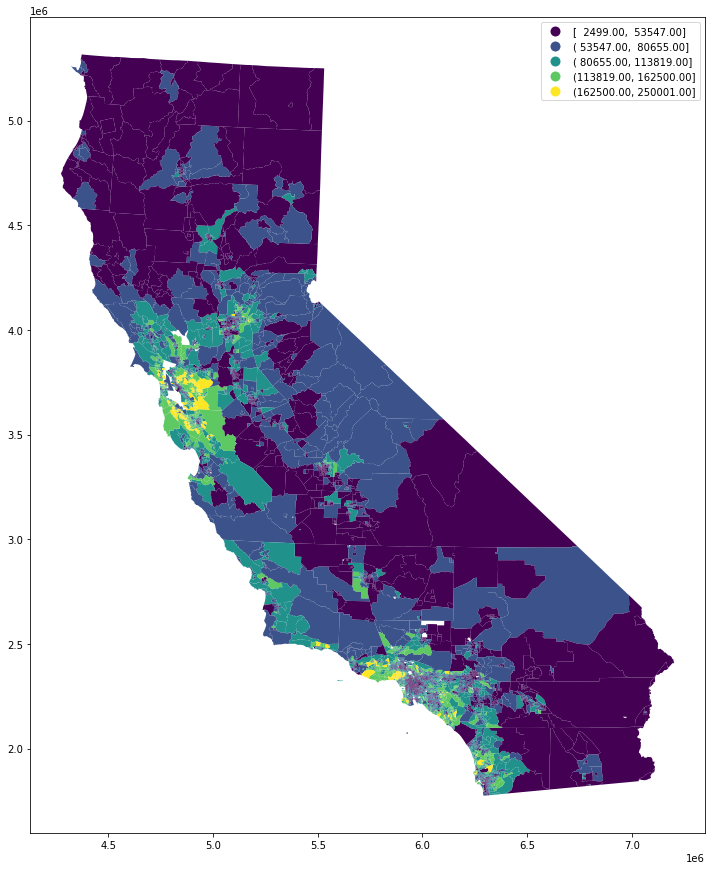

In [15]:
county_income.plot(column='median_household_income', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

In [16]:
plt.savefig('county_income.png')

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

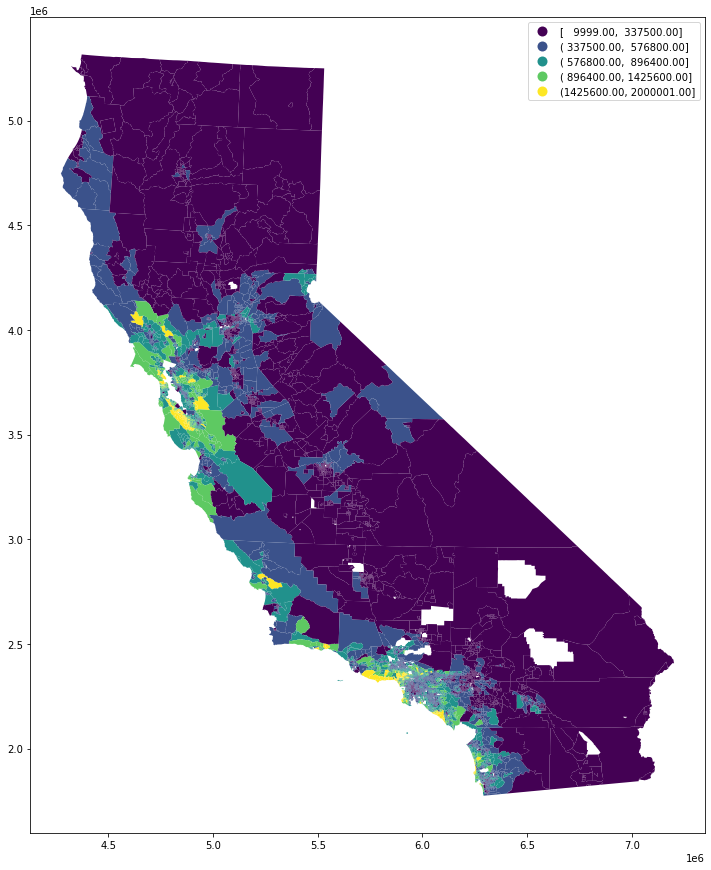

In [17]:
county_income.plot(column='median_home_value', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

In [18]:
plt.savefig('median_home_value.png')

<Figure size 432x288 with 0 Axes>

In [19]:
#crs

<AxesSubplot:>

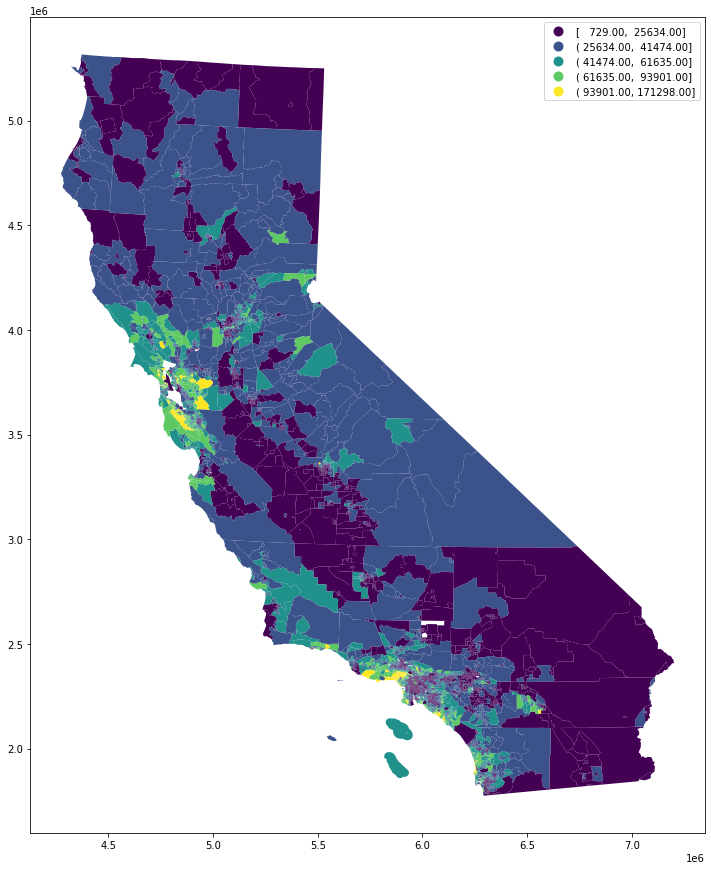

In [20]:
county_income.plot(column='per_capita_income', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

In [21]:
plt.savefig('per_capita_income.png')

<Figure size 432x288 with 0 Axes>

In [22]:
county_income.crs

In [23]:
#School County Data

In [24]:
sch = gpd.read_parquet('SchoolCounty_Data.parquet')

In [25]:
sch.head()

,geoid,geometry,fips,name,state,CountyName,ChronicAbsenteeismCount,CumulativeEnrollment,absentrate,Dropout (Rate),Regular HS Diploma Graduates (Rate)
0,06001,"POLYGON ((-122.28088 37.70723, -122.28178 37.7...",06001,Alameda,CA,Alameda,373198.0,2345464.0,0.159115,46304.3,345454.1
1,06005,"POLYGON ((-121.02729 38.48136, -121.02729 38.4...",06005,Amador,CA,Amador,7356.0,48087.0,0.152973,863.6,18292.4
3,06007,"POLYGON ((-121.85650 39.53358, -121.85638 39.5...",06007,Butte,CA,Butte,58888.0,338729.0,0.173850,17108.3,88204.6
5,06009,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",06009,Calaveras,CA,Calaveras,9848.0,58591.0,0.168080,1854.2,29262.6
6,06011,"POLYGON ((-122.08018 39.41420, -122.07996 39.4...",06011,Colusa,CA,Colusa,5371.0,60099.0,0.089369,2365.2,29169.2


In [26]:
sch.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 57 entries, 0 to 84
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   geoid                                57 non-null     object  
 1   geometry                             57 non-null     geometry
 2   fips                                 57 non-null     object  
 3   name                                 57 non-null     object  
 4   state                                57 non-null     object  
 5   CountyName                           57 non-null     object  
 6   ChronicAbsenteeismCount              57 non-null     float64 
 7   CumulativeEnrollment                 57 non-null     float64 
 8   absentrate                           57 non-null     float64 
 9   Dropout (Rate)                       57 non-null     float64 
 10  Regular HS Diploma Graduates (Rate)  57 non-null     float64 
dtypes: float64(5)

In [27]:
sch.head()

,geoid,geometry,fips,name,state,CountyName,ChronicAbsenteeismCount,CumulativeEnrollment,absentrate,Dropout (Rate),Regular HS Diploma Graduates (Rate)
0,06001,"POLYGON ((-122.28088 37.70723, -122.28178 37.7...",06001,Alameda,CA,Alameda,373198.0,2345464.0,0.159115,46304.3,345454.1
1,06005,"POLYGON ((-121.02729 38.48136, -121.02729 38.4...",06005,Amador,CA,Amador,7356.0,48087.0,0.152973,863.6,18292.4
3,06007,"POLYGON ((-121.85650 39.53358, -121.85638 39.5...",06007,Butte,CA,Butte,58888.0,338729.0,0.173850,17108.3,88204.6
5,06009,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",06009,Calaveras,CA,Calaveras,9848.0,58591.0,0.168080,1854.2,29262.6
6,06011,"POLYGON ((-122.08018 39.41420, -122.07996 39.4...",06011,Colusa,CA,Colusa,5371.0,60099.0,0.089369,2365.2,29169.2


In [30]:
sch.columns

Index(['geoid', 'geometry', 'fips', 'name', 'state', 'CountyName',
       'ChronicAbsenteeismCount', 'CumulativeEnrollment', 'absentrate',
       'Dropout (Rate)', 'Regular HS Diploma Graduates (Rate)'],
      dtype='object')

<AxesSubplot:>

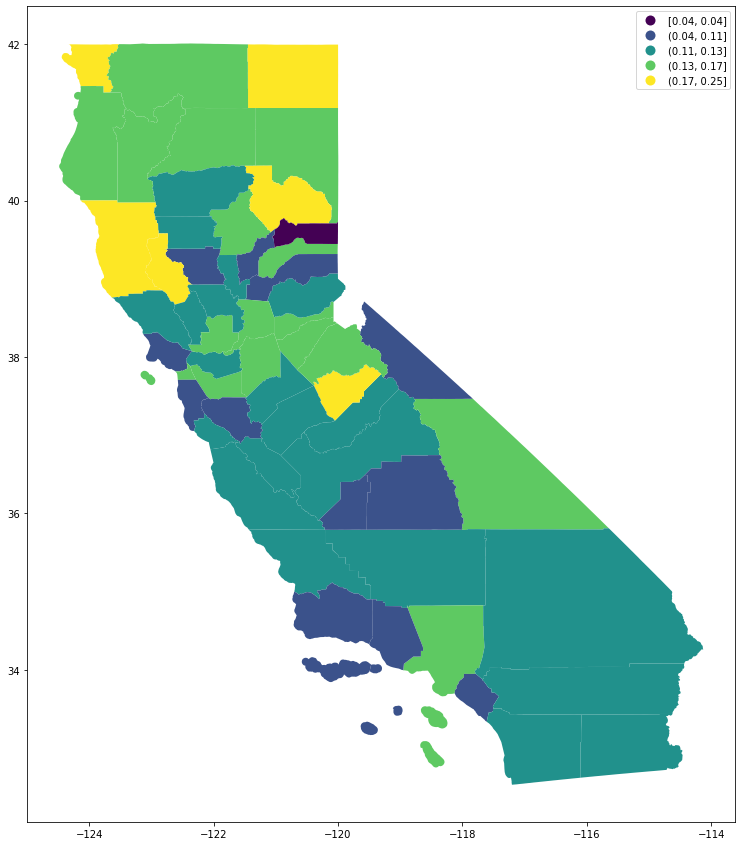

In [28]:
sch.plot(column='absentrate', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

In [29]:
plt.savefig('sch_absentrate.png')

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

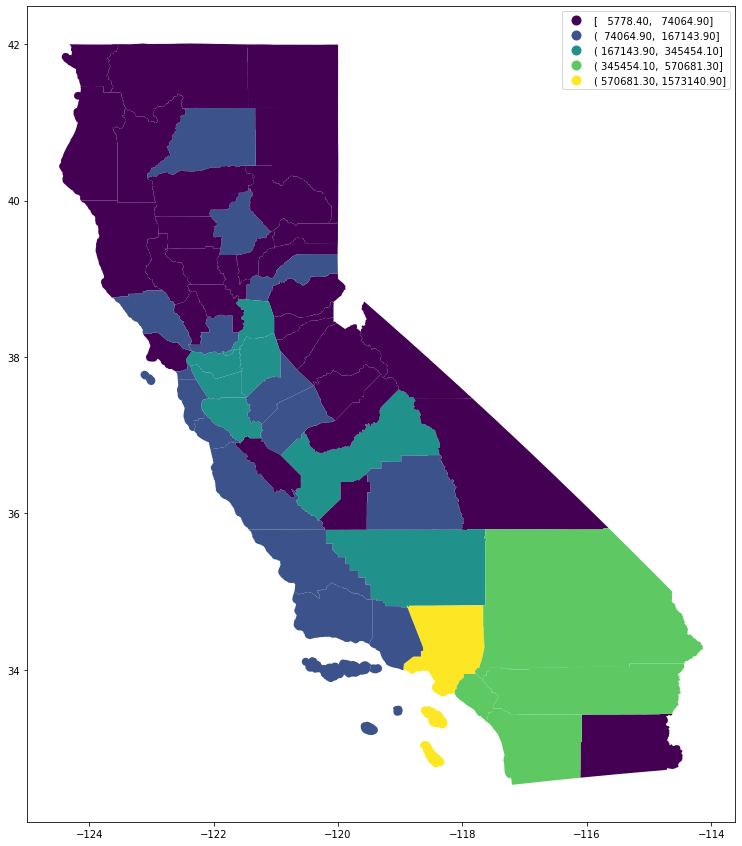

In [31]:
sch.plot(column='Regular HS Diploma Graduates (Rate)', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

In [32]:
plt.savefig('sch_hsgradrate.png')

<Figure size 432x288 with 0 Axes>

In [156]:
#crs

In [157]:
sch.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [158]:
county_income.crs = "EPSG:4326" 

In [159]:
county_income = county_income.to_crs(sch.crs)

In [160]:
county_income.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [161]:
county_income.head()

,GEOID,geometry,median_household_income,median_home_value,per_capita_income
0,06037,"POLYGON ((5987925.784 2275112.258, 5988249.105...",55703.0,450200.0,23331.0
1,06037,"POLYGON ((5987299.089 2275049.015, 5987348.882...",56452.0,461200.0,22520.0
2,06037,"POLYGON ((5992628.264 2276367.468, 5992690.382...",42969.0,453200.0,19127.0
3,06037,"POLYGON ((5992635.820 2276956.239, 5992710.707...",81480.0,460200.0,34880.0
4,06037,"POLYGON ((5993599.563 2274986.574, 5993703.488...",63625.0,464800.0,20344.0


In [162]:
county_income=county_income.reset_index()

In [163]:
county_income.head()

,index,GEOID,geometry,median_household_income,median_home_value,per_capita_income
0,0,06037,"POLYGON ((5987925.784 2275112.258, 5988249.105...",55703.0,450200.0,23331.0
1,1,06037,"POLYGON ((5987299.089 2275049.015, 5987348.882...",56452.0,461200.0,22520.0
2,2,06037,"POLYGON ((5992628.264 2276367.468, 5992690.382...",42969.0,453200.0,19127.0
3,3,06037,"POLYGON ((5992635.820 2276956.239, 5992710.707...",81480.0,460200.0,34880.0
4,4,06037,"POLYGON ((5993599.563 2274986.574, 5993703.488...",63625.0,464800.0,20344.0


In [164]:
county_income.rename(columns = {'GEOID':'geoid'}, inplace = True)

In [165]:
county_income.head()

,index,geoid,geometry,median_household_income,median_home_value,per_capita_income
0,0,06037,"POLYGON ((5987925.784 2275112.258, 5988249.105...",55703.0,450200.0,23331.0
1,1,06037,"POLYGON ((5987299.089 2275049.015, 5987348.882...",56452.0,461200.0,22520.0
2,2,06037,"POLYGON ((5992628.264 2276367.468, 5992690.382...",42969.0,453200.0,19127.0
3,3,06037,"POLYGON ((5992635.820 2276956.239, 5992710.707...",81480.0,460200.0,34880.0
4,4,06037,"POLYGON ((5993599.563 2274986.574, 5993703.488...",63625.0,464800.0,20344.0


In [1]:
socal_income = county_income[county_income.geoid == '60330,06059,06037,06073,06071,06083,06025,06111']

NameError: name 'county_income' is not defined

In [ ]:
socal_income.head()

In [166]:
sch_income.head()

,geoid,geometry_x,fips,name,state,CountyName,ChronicAbsenteeismCount,CumulativeEnrollment,absentrate,Dropout (Rate),Regular HS Diploma Graduates (Rate),geometry_y,median_household_income,median_home_value,per_capita_income
0,06001,"POLYGON ((-122.28088 37.70723, -122.28178 37.7...",06001,Alameda,CA,Alameda,373198.0,2345464.0,0.159115,46304.3,345454.1,"POLYGON ((4917194.941 3614522.476, 4917150.603...",35617311.0,249149602.0,16280835.0
1,06005,"POLYGON ((-121.02729 38.48136, -121.02729 38.4...",06005,Amador,CA,Amador,7356.0,48087.0,0.152973,863.6,18292.4,"POLYGON ((5327665.355 3945457.409, 5327513.470...",554908.0,2690900.0,272068.0
2,06007,"POLYGON ((-121.85650 39.53358, -121.85638 39.5...",06007,Butte,CA,Butte,58888.0,338729.0,0.173850,17108.3,88204.6,"POLYGON ((4952368.311 4287623.135, 4952479.510...",2584923.0,12915300.0,1373736.0
3,06009,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",06009,Calaveras,CA,Calaveras,9848.0,58591.0,0.168080,1854.2,29262.6,"POLYGON ((5371063.042 3841172.558, 5371068.838...",554899.0,2975500.0,366966.0
4,06011,"POLYGON ((-122.08018 39.41420, -122.07996 39.4...",06011,Colusa,CA,Colusa,5371.0,60099.0,0.089369,2365.2,29169.2,"POLYGON ((4940278.078 4225260.468, 4940281.870...",276926.0,1202700.0,138724.0


In [180]:
sch_income[['CountyName', 'geoid']].groupby


<bound method DataFrame.groupby of          CountyName  geoid
0           Alameda  06001
1            Amador  06005
2             Butte  06007
3         Calaveras  06009
4            Colusa  06011
5      Contra Costa  06013
6         Del Norte  06015
7         El Dorado  06017
8            Fresno  06019
9             Glenn  06021
10         Humboldt  06023
11         Imperial  06025
12             Inyo  06027
13             Kern  06029
14            Kings  06031
15             Lake  06033
16           Lassen  06035
17      Los Angeles  06037
18           Madera  06039
19            Marin  06041
20         Mariposa  06043
21        Mendocino  06045
22           Merced  06047
23            Modoc  06049
24             Mono  06051
25         Monterey  06053
26             Napa  06055
27           Nevada  06057
28           Orange  06059
29           Placer  06061
30           Plumas  06063
31        Riverside  06065
32       Sacramento  06067
33       San Benito  06069
34   San Bernardino 

In [167]:
#sch_income .shape

In [168]:
#sch_income.plot()

In [169]:
demographic = gpd.read_parquet('demographics_tracts.parquet')

In [170]:
demographic.head()

,GEOID1,total_mf_10_19,geometry
0,06037137504,229.0,"POLYGON ((-118.58119 34.14318, -118.58099 34.1..."
1,06037138000,404.0,"POLYGON ((-118.60573 34.14585, -118.60561 34.1..."
2,06037139200,625.0,"POLYGON ((-118.53082 34.18024, -118.52952 34.1..."
3,06067002300,259.0,"POLYGON ((-121.50218 38.55643, -121.50184 38.5..."
4,06067002400,452.0,"POLYGON ((-121.50970 38.54070, -121.50960 38.5..."


In [171]:
demographic['GEOID1'] = demographic['GEOID1'].astype(str).str[:5]

In [172]:
income.GEOID.astype('object')

0       06037
1       06037
2       06037
3       06037
4       06037
        ...  
8052    06115
8053    06115
8054    06115
8055    06115
8056    06115
Name: GEOID, Length: 8057, dtype: object

In [173]:
dmg = demographic.dissolve(by='GEOID1', aggfunc='sum')

In [174]:
dmg.crs = "EPSG:4326"

In [175]:
dmg = dmg.to_crs(county_income.crs)

In [176]:
dmg.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [126]:
dmg.head()

,geometry,total_mf_10_19
GEOID1,,
06001,"POLYGON ((-121.90392 37.46454, -121.90407 37.4...",189657.0
06003,"POLYGON ((-120.07333 38.70109, -120.07324 38.7...",193.0
06005,"POLYGON ((-120.54130 38.42291, -120.54181 38.4...",3705.0
06007,"POLYGON ((-121.90870 39.30799, -121.90834 39.3...",27187.0
06009,"POLYGON ((-120.37620 38.14265, -120.37616 38.1...",4245.0


In [127]:
dmg.head()

,geometry,total_mf_10_19
GEOID1,,
06001,"POLYGON ((-121.90392 37.46454, -121.90407 37.4...",189657.0
06003,"POLYGON ((-120.07333 38.70109, -120.07324 38.7...",193.0
06005,"POLYGON ((-120.54130 38.42291, -120.54181 38.4...",3705.0
06007,"POLYGON ((-121.90870 39.30799, -121.90834 39.3...",27187.0
06009,"POLYGON ((-120.37620 38.14265, -120.37616 38.1...",4245.0


In [128]:
dmg.rename(columns = {'GEOID1':'geoid'}, inplace = True)

In [129]:
dmg.head()

,geometry,total_mf_10_19
GEOID1,,
06001,"POLYGON ((-121.90392 37.46454, -121.90407 37.4...",189657.0
06003,"POLYGON ((-120.07333 38.70109, -120.07324 38.7...",193.0
06005,"POLYGON ((-120.54130 38.42291, -120.54181 38.4...",3705.0
06007,"POLYGON ((-121.90870 39.30799, -121.90834 39.3...",27187.0
06009,"POLYGON ((-120.37620 38.14265, -120.37616 38.1...",4245.0


In [130]:
dmg=dmg.reset_index()

In [131]:
dmg.head()

,GEOID1,geometry,total_mf_10_19
0,06001,"POLYGON ((-121.90392 37.46454, -121.90407 37.4...",189657.0
1,06003,"POLYGON ((-120.07333 38.70109, -120.07324 38.7...",193.0
2,06005,"POLYGON ((-120.54130 38.42291, -120.54181 38.4...",3705.0
3,06007,"POLYGON ((-121.90870 39.30799, -121.90834 39.3...",27187.0
4,06009,"POLYGON ((-120.37620 38.14265, -120.37616 38.1...",4245.0


In [132]:
dmg_sch.head()

,geoid,geometry_county_x,fips,name,state,CountyName,ChronicAbsenteeismCount,CumulativeEnrollment,absentrate,Dropout (Rate),Regular HS Diploma Graduates (Rate),geometry_y,median_household_income,median_home_value,per_capita_income,index,geometry_county_y,total_mf_10_19
0,06001,"POLYGON ((-122.28088 37.70723, -122.28178 37.7...",06001,Alameda,CA,Alameda,373198.0,2345464.0,0.159115,46304.3,345454.1,"POLYGON ((4917194.941 3614522.476, 4917150.603...",35617311.0,249149602.0,16280835.0,0,"POLYGON ((-121.90392 37.46454, -121.90407 37.4...",189657.0
1,06005,"POLYGON ((-121.02729 38.48136, -121.02729 38.4...",06005,Amador,CA,Amador,7356.0,48087.0,0.152973,863.6,18292.4,"POLYGON ((5327665.355 3945457.409, 5327513.470...",554908.0,2690900.0,272068.0,2,"POLYGON ((-120.54130 38.42291, -120.54181 38.4...",3705.0
2,06007,"POLYGON ((-121.85650 39.53358, -121.85638 39.5...",06007,Butte,CA,Butte,58888.0,338729.0,0.173850,17108.3,88204.6,"POLYGON ((4952368.311 4287623.135, 4952479.510...",2584923.0,12915300.0,1373736.0,3,"POLYGON ((-121.90870 39.30799, -121.90834 39.3...",27187.0
3,06009,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",06009,Calaveras,CA,Calaveras,9848.0,58591.0,0.168080,1854.2,29262.6,"POLYGON ((5371063.042 3841172.558, 5371068.838...",554899.0,2975500.0,366966.0,4,"POLYGON ((-120.37620 38.14265, -120.37616 38.1...",4245.0
4,06011,"POLYGON ((-122.08018 39.41420, -122.07996 39.4...",06011,Colusa,CA,Colusa,5371.0,60099.0,0.089369,2365.2,29169.2,"POLYGON ((4940278.078 4225260.468, 4940281.870...",276926.0,1202700.0,138724.0,5,"POLYGON ((-121.93917 39.13614, -121.93915 39.1...",3177.0


In [133]:
dmg_sch.to_csv('school-demographic.csv')

<AxesSubplot:xlabel='total_mf_10_19', ylabel='absentrate'>

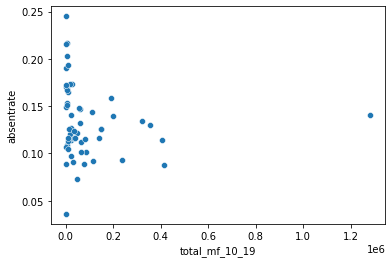

In [134]:
sns.scatterplot(data=dmg_sch, y="absentrate", x="total_mf_10_19")

<AxesSubplot:>

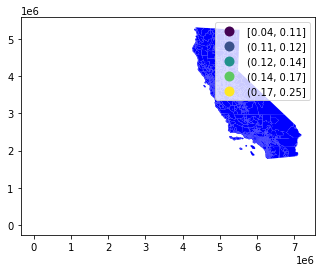

In [200]:
base = sch.plot(column='absentrate', scheme='Quantiles', k=5, legend=True)
county_income.plot(ax=base, color='blue')

<AxesSubplot:>

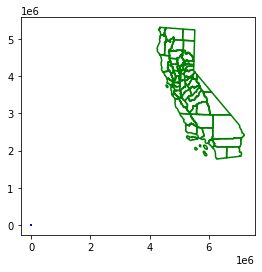

In [135]:
base = sch.geometry.boundary.plot(edgecolor='blue')
county_income.geometry.boundary.plot(ax=base, edgecolor='green')
dmg.plot(color='red', ax=base)

<AxesSubplot:>

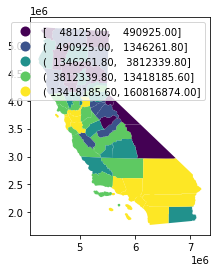

In [137]:
county_income.plot(column='median_household_income', scheme='Quantiles', k=5, legend=True)

<AxesSubplot:>

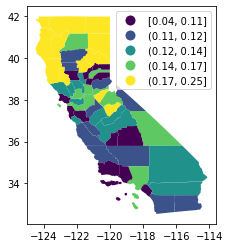

In [138]:
sch.plot(column='absentrate', scheme='Quantiles', k=5, legend=True)

In [ ]:
county_income.plot(column='', scheme='Quantiles', k=5, legend=True)

<AxesSubplot:>

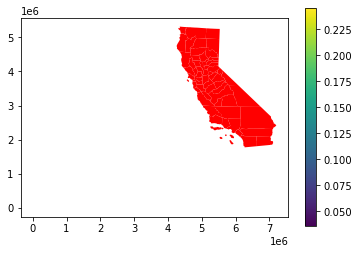

In [139]:
base  = sch.plot(column='absentrate', legend=True)
county_income.plot(color='red', ax=base)

In [140]:
schools_income = gpd.sjoin(sch, county_income, how='left', op='within')

In [141]:
schools_income

,geoid_left,geometry,fips,name,state,CountyName,ChronicAbsenteeismCount,CumulativeEnrollment,absentrate,Dropout (Rate),Regular HS Diploma Graduates (Rate),index_right,geoid_right,median_household_income,median_home_value,per_capita_income
0,06001,"POLYGON ((-122.28088 37.70723, -122.28178 37.7...",06001,Alameda,CA,Alameda,373198.0,2345464.0,0.159115,46304.3,345454.1,NaN,NaN,NaN,NaN,NaN
1,06005,"POLYGON ((-121.02729 38.48136, -121.02729 38.4...",06005,Amador,CA,Amador,7356.0,48087.0,0.152973,863.6,18292.4,NaN,NaN,NaN,NaN,NaN
3,06007,"POLYGON ((-121.85650 39.53358, -121.85638 39.5...",06007,Butte,CA,Butte,58888.0,338729.0,0.173850,17108.3,88204.6,NaN,NaN,NaN,NaN,NaN
5,06009,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",06009,Calaveras,CA,Calaveras,9848.0,58591.0,0.168080,1854.2,29262.6,NaN,NaN,NaN,NaN,NaN
6,06011,"POLYGON ((-122.08018 39.41420, -122.07996 39.4...",06011,Colusa,CA,Colusa,5371.0,60099.0,0.089369,2365.2,29169.2,NaN,NaN,NaN,NaN,NaN
7,06013,"POLYGON ((-122.26764 37.90425, -122.26781 37.9...",06013,Contra Costa,CA,Contra Costa,226112.0,1792240.0,0.126162,29711.4,235645.6,NaN,NaN,NaN,NaN,NaN
8,06015,"POLYGON ((-124.31611 41.72839, -124.33061 41.7...",06015,Del Norte,CA,Del Norte,9230.0,45492.0,0.202893,2919.3,20509.9,NaN,NaN,NaN,NaN,NaN
9,06017,"POLYGON ((-121.11862 38.71712, -121.11876 38.7...",06017,El Dorado,CA,El Dorado,30818.0,269761.0,0.114242,7349.0,58730.7,NaN,NaN,NaN,NaN,NaN
10,06019,"POLYGON ((-119.70536 36.99979, -119.70502 37.0...",06019,Fresno,CA,Fresno,296474.0,2352385.0,0.126031,53242.8,269718.1,NaN,NaN,NaN,NaN,NaN
11,06021,"POLYGON ((-122.89094 39.64487, -122.89134 39.6...",06021,Glenn,CA,Glenn,7221.0,66047.0,0.109331,6634.6,28513.2,NaN,NaN,NaN,NaN,NaN
